<a href="https://colab.research.google.com/github/btg1631/study_AIs/blob/main/docs/quests/NLPs/classification_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 준비

In [103]:
import pandas as pd
import numpy as np

df_ITN = pd.read_excel('IT News.xlsx', sheet_name=None)

In [ ]:
file_path = 'NLP_classification.pkl'

import pickle
with open(file_path, 'rb') as pickle_file:
  loaded_model = pickle.load(pickle_file)

In [84]:
file_path = 'NLP_classification_tfidfVectorizer.pkl'

import pickle
with open(file_path, 'rb') as pickle_file:
  loaded_model_tfidfVectorizer = pickle.load(pickle_file)

## 데이터 전처리

In [ ]:
df_sheets = []
for sheet_name, df in df_ITN.items() :
  df_sheets.append(df)
  print(f'{sheet_name}, {type(df)}')

In [ ]:
for x in df_sheets :
  print(x.columns)
  if x.columns[0] != '이름' :
    x.rename(columns = {f'{x.columns[0]}':'이름'}, inplace=True)

In [171]:
df_all = pd.concat(df_ITN.values(), axis=1)
df_ITN_text = df_all['뉴스명'].stack().dropna().values.tolist()
df_ITN_text
# df_ITN_text = df_all.query('이름=="장영지"')[['뉴스명']].dropna(1).values.tolist()
# df_ITN_text

['개보위 "맞춤형 광고 개인정보 처리 투명성 높인다"',
 '정보공개청구, 이제 AI가 돕는다…내용요약·처리방향까지 ‘척척’',
 '테슬라, 해킹 대회서 또 뚫렸다',
 '스마트폰 AI 경쟁 신호탄 쏜 갤럭시…유료화 가능성은',
 'KOSA , SW분야 근로자 역량 강화 프로그램 실시',
 '"생성 AI, 3년 뒤 전통 마케팅 업무 30% 대신할 것"',
 '게임사는 AI를 어떻게 활용할까',
 '[CES 2024] SK하이닉스, AI 인프라 기술력 뽐낸다…CXL⋅CMS 등 전시',
 '"AI 모니터링, 얼굴인식 솔루션까지" 새해 보안업계 트렌드는?',
 'https://www.dailian.co.kr/news/view/1329153/?sc=Naver',
 '국내 제약바이오, ‘저조한’ AI 신약 개발 경쟁력…해법은?',
 '[비상경제장관회의] 국가통합 바이오 빅데이터 4월 개시…감염병·재생의료 R&D 강화',
 '제약·바이오社 "AI신약개발, 뭉쳐야 산다"',
 '쓰리빅스, 바이오 빅데이터 분석 플랫폼 ‘3X-INSIGHTS’ 출시',
 "유튜브에 밀려난 카카오톡, '국민앱' 탈환할 수 있을까 [IT+]",
 '"챗GPT 답변에 내정보 노출 안되게"…정부, 데이터 사용기준 마련',
 '의료 혁신 드라이브거는 윤석열 정부… 디지털 헬스케어 본격화되나',
 '토마토 주스에 장내 세균 넣자 24시간 만에 궤멸',
 '올해도, 내년에도 숨 가쁜 AI 시장…주목할 만한 키워드는?',
 '생성 AI로 \'눈 건강\' 꼼꼼 관리…"데이터 윤리 과제 수북"[미래on]',
 'B tv "AI로 콘텐츠 추천…드라마 속 상품도 곧바로 쇼핑"',
 'AI 입힌 카카오톡, 대화 요약·말투 변경 기능 도입',
 'AI가 공무원 문서 작성·민원대응 돕는다…행정서비스에 AI 적용',
 '카카오쇼핑 모바일 교환권, 삼성페이에서 쓴다',
 '가우디오랩, AI 소음제거 기술 SXSW 혁신상에 올라',
 '브이캣, SSG닷컴에 ‘영상 및 배너 제작 AI 솔루션’ 공급',
 '네이버, 쇼핑 상

In [149]:
# !pip install konlpy

In [163]:
from konlpy.tag import Okt
okt = Okt()

In [178]:
# 조사, 어미, 구두점 같은 것을 제거
def okt_clean(text):
  list = []
  for x in text:
    clean_text = []
    for word in okt.pos(x, stem=True):
        if word[1] not in ['Josa', 'Eomi', 'Punctuation']:
            clean_text.append(word[0])
    list.append(" ".join(clean_text))

  return list

In [179]:
sentence_nouns = okt_clean(df_ITN_text)
sentence_nouns

['개 보위 맞춤 형 광고 개인정보 처리 투명 성 높이다',
 '정보공개 청구 이제 AI 가다 돕다 내용 요약 처리 방향 ‘ 척척',
 '테슬라 해킹 대회 또 뚫리다',
 '스마트폰 AI 경쟁 신호탄 쏘다 갤럭시 유료 화 가능성',
 'KOSA SW 분야 근로자 역량 강화 프로그램 실시',
 '생 성 AI 3년 뒤 전통 마케팅 업무 30% 대신 하다 것',
 '게임 살다 AI 를 어떻다 활용 하다',
 'CES 2024 SK 하이닉스 AI 인프라 기술 력 뽐내다 CXL ⋅ CMS 등 전시',
 'AI 모니터링 얼굴인식 솔루션 새해 보안 업계 트렌드',
 'https://www.dailian.co.kr/news/view/1329153/?sc=Naver',
 '국내 제약 바이오 ‘ 저조하다 AI 신약 개발 경쟁력 해법',
 '비상 경제 장관 회의 국가 통합 바이오 빅데이터 4월 개시 감염병 재생 의료 R D 강화',
 '제약 바이오 社 AI 신약 개발 뭉치다 산다',
 '쓰리다 빅스 바이오 빅데이터 분석 플랫폼 ‘ 3 X INSIGHTS 출시',
 '유튜브 밀리다 카카오 톡 국민 앱 탈환 하다 수 있다 IT',
 '챗 GPT 답변 내 정보 노출 안되다 정부 데이터 사용 기준 마련',
 '의료 혁신 드라이브 거 윤석열 정부 디지털 헬 스케 어 본격 화 되다',
 '토마토 주스 장내 세균 넣다 24시간 궤멸',
 '올해 내년 숨 가쁜 AI 시장 주목 하다 만 키우다 들다',
 '생 성 AI 로 눈 건강 꼼꼼 관리 데이터 윤리 과제 수 북 미래 on',
 'B tv AI 로 콘텐츠 추천 드라마 속 상품 곧바로 쇼핑',
 'AI 입히다 카카오 톡 대화 요약 말투 변경 기능 도입',
 'AI 가다 공무원 문서 작성 민원 대응 돕다 행정 서비스 AI 적용',
 '카카오 쇼핑 모바일 교환 권 삼 성 페이 쓴다',
 '가우디 오 랩 AI 소음 제거 기술 SXSW 혁신 상 오르다',
 '브이 캣 SSG 닷 컴 ‘ 영상 및 배너 제작 AI 솔루션 공급',
 '네이버 쇼핑 상세 페이

In [182]:
# Tokenizing
sentence_tokens = loaded_model_tfidfVectorizer.transform(sentence_nouns)  # 학습할 때 형식 그대로 이용
sentence_tokens

<328x27288 sparse matrix of type '<class 'numpy.float64'>'
	with 2410 stored elements in Compressed Sparse Row format>

In [183]:
sentence_tokens.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [184]:
import numpy as np
np.where(sentence_tokens.toarray() > 0)

(array([  0,   0,   0, ..., 326, 326, 326]),
 array([ 1692,  2854,  5387, ...,  7199, 13849, 25464]))

In [193]:
# 예측(predict)
predict_result = loaded_model.predict(sentence_tokens.toarray())
predict_result

array([2., 0., 0., 0., 2., 0., 0., 0., 0., 2., 0., 6., 0., 0., 0., 6., 6.,
       2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 4., 0., 0., 2.,
       0., 0., 0., 2., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 2., 3., 0., 0., 1., 0., 0., 1., 2., 1.,
       2., 2., 2., 2., 1., 3., 1., 2., 1., 4., 4., 1., 0., 1., 1., 0., 0.,
       0., 3., 2., 2., 6., 2., 2., 1., 0., 0., 4., 0., 0., 1., 2., 0., 2.,
       1., 0., 4., 0., 0., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 2., 0., 3., 2., 0., 2., 2., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 3., 3., 1., 0., 2., 0., 0.,
       2., 0., 3., 0., 0., 0., 0., 1., 3., 0., 2., 2., 6., 0., 0., 0., 0.,
       0., 0., 2., 0., 0., 0., 0., 2., 0., 0., 4., 0., 1., 2., 0., 2., 0.,
       2., 4., 0., 0., 0., 0., 2., 2., 2., 2., 0., 0., 0., 1., 0., 0., 2.,
       1., 0., 2., 0., 3.

# 서비스

In [189]:
topic = pd.read_csv('topic_dict.csv')
topic

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


In [ ]:
predict_result = [int(i) for i in predict_result]
predict_result

In [ ]:
result_list = []
for i in predict_result:
  if topic['topic_idx'][i] == i:
    result_list.append(topic['topic'][i])
result_list

# wordcolud

In [206]:
from wordcloud import WordCloud
from collections import Counter

In [204]:
text_count = Counter(result_list)

In [ ]:
!apt-get -y install fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [210]:
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(text_count)

In [211]:
wordCloud.words_

{'IT과학': 1.0,
 '사회': 0.22869955156950672,
 '경제': 0.11210762331838565,
 '생활문화': 0.05829596412556054,
 '세계': 0.04035874439461883,
 '정치': 0.03139013452914798}

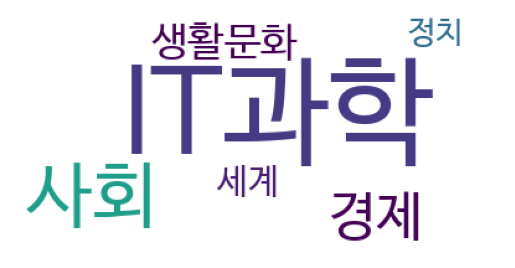

In [212]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()